
#Tesla Revenue Vs Stock Price Analysis


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
html_data=requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

In [ ]:
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])
soup=BeautifulSoup(html_data,'html5lib')
table=soup.find_all('tbody')[1]
column=table.find_all('td')
date=column[0].text
revenue=column[1].text
for date,revenue in zip(column[0::2],column[1::2]):
  tesla_revenue=pd.concat([tesla_revenue,pd.DataFrame({'Date': [date.text], 'Revenue': [revenue.text]})], ignore_index=True)
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3152827612.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
from numpy import astype
tesla_revenue['Date']=pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue']=tesla_revenue['Revenue'].astype(int)
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [ ]:
tesla_revenue.dtypes

,0
Date,datetime64[ns]
Revenue,int64


In [ ]:
sorted_revenue=tesla_revenue.sort_values(by='Date',ascending=True).reset_index(drop=True)
sorted_revenue.head()

,Date,Revenue
0,2009-06-30,27
1,2009-09-30,46
2,2010-03-31,21
3,2010-06-30,28
4,2010-09-30,31


In [34]:
sorted_revenue.to_csv('tesla_revenue.csv',index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

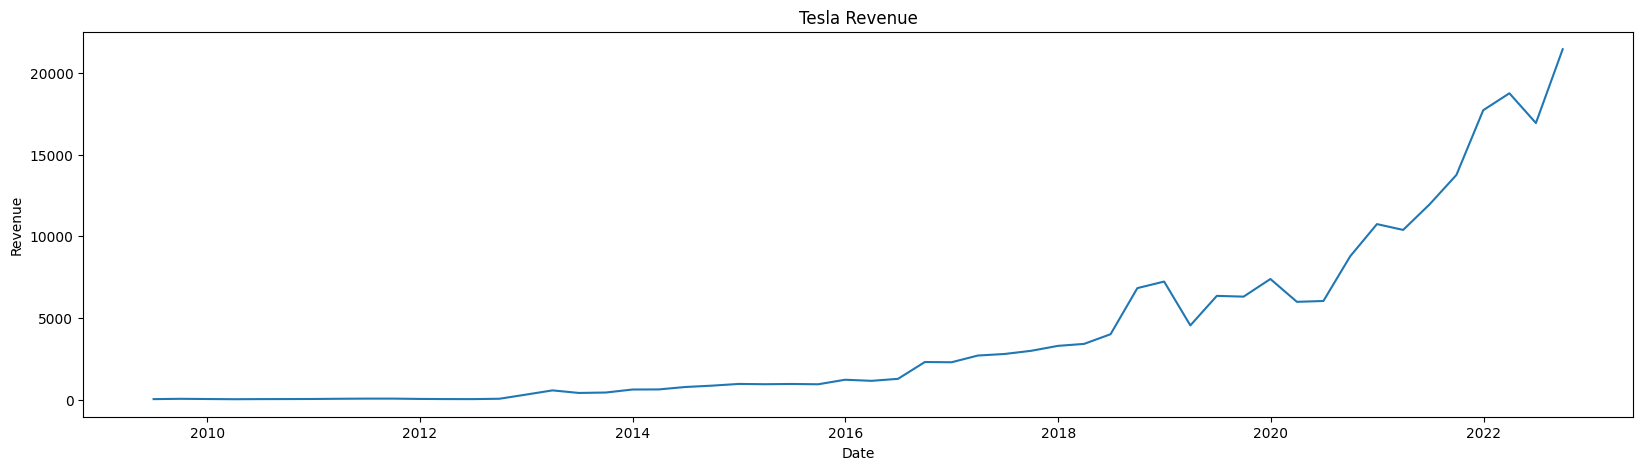

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Revenue',data=sorted_revenue)
plt.title('Tesla Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [26]:
tesla_data.dtypes

,0
Date,"datetime64[ns, America/New_York]"
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [35]:
tesla_data.to_csv('tesla_Stock_data.csv',index=False)

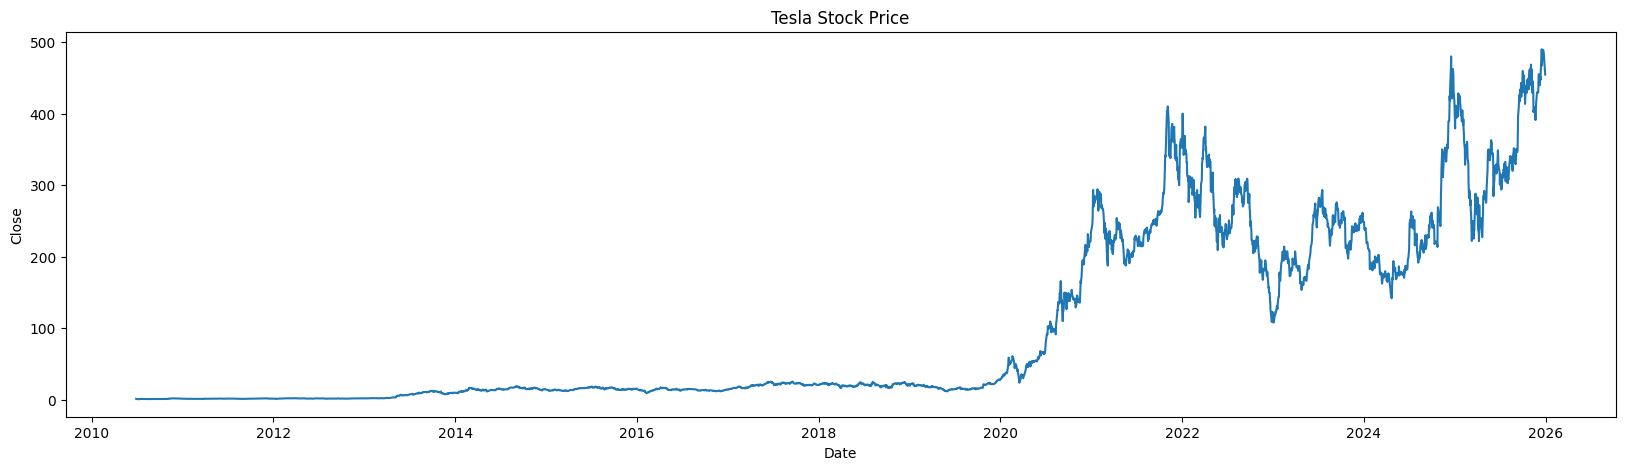

In [31]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Close',data=tesla_data)
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()